# Домашнее задание 2 (2). Чижикова Настя БКЛ181

#### Еще раз анализируем текст, чтобы в этот раз сохранить все нужные данные

In [125]:
from pprint import pprint
from pymorphy2 import MorphAnalyzer

with open('ubit-peresmeshnika.txt', encoding='utf-8') as f:
    book = f.read()

In [6]:
#Обработка с помощью PyMorphy

import nltk
from nltk.tokenize import word_tokenize

#Токенизируем текст, удаляем пунктцацию и делаем отдельный список для слов с разметкой

morph = MorphAnalyzer()
tokens = nltk.word_tokenize(book)
words = [w.lower() for w in tokens if w.isalpha()]
ana_text = []
for word in words:
    ana = morph.parse(word)
    ana_text.append(ana)

#### Импортируем нужные модули

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
random.seed = 23

import pandas as pd

#### Сохраняем все слова с нужными параметрами в один словарь

In [19]:
t_words = []
for t in ana_text:
    word_d = {}
    word_d['Слово'] = t[0].word
    word_d['Лемма'] = t[0].normal_form
    word_d['POS'] = t[0].tag.POS
    word_d['Одушевленность'] = t[0].tag.animacy 
    word_d['Вид'] = t[0].tag.aspect
    word_d['Род'] = t[0].tag.gender 
    word_d['Падеж'] = t[0].tag.case 
    word_d['Вовлеченность'] = t[0].tag.involvement
    word_d['Наклонение'] = t[0].tag.mood
    word_d['Число'] = t[0].tag.number
    word_d['Лицо'] = t[0].tag.person
    word_d['Время'] = t[0].tag.tense
    word_d['Переходность'] = t[0].tag.transitivity
    word_d['Залог'] = t[0].tag.voice
    t_words.append(word_d)

#### Записываем таблицу в файл и оттуда выводим

In [57]:
df = pd.DataFrame(t_words)
df.to_csv('table.csv', sep='\t', index=False)
df = pd.read_csv('table.csv', sep='\t').fillna('')

In [58]:
df

,POS,Вид,Вовлеченность,Время,Залог,Лемма,Лицо,Наклонение,Одушевленность,Падеж,Переходность,Род,Слово,Число
0,,,,,,annotation,,,,,,,annotation,
1,NOUN,,,,,история,,,inan,nomn,,femn,история,sing
2,ADJF,,,,,маленький,,,,gent,,masc,маленького,sing
3,ADJF,,,,,сонный,,,,gent,,masc,сонного,sing
4,NOUN,,,,,городок,,,inan,gent,,masc,городка,sing
5,PREP,,,,,на,,,,,,,на,
6,NOUN,,,,,юг,,,inan,loct,,masc,юге,sing
7,NOUN,,,,,америка,,,inan,gent,,femn,америки,sing
8,PRTF,perf,,past,pssv,поведать,,,,nomn,tran,femn,поведанная,sing
9,NOUN,,,,,маленькая,,,anim,gent,,femn,маленькой,sing


#### График 1

Text(0, 0.5, 'количество вхождений')

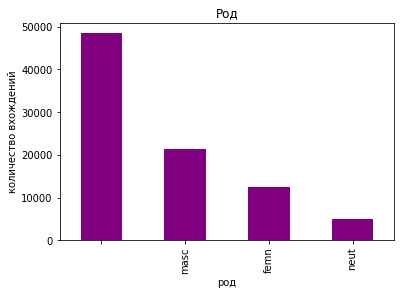

In [60]:
df['Род'].value_counts().plot.bar(color='purple')
plt.title('Род')
plt.xlabel('род')
plt.ylabel('количество вхождений')

#### Пайчарт 2

Text(0.5, 1.0, 'Род')

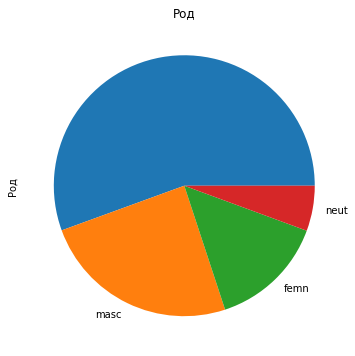

In [65]:
plt.figure(figsize=(6, 6))
df['Род'].value_counts().plot(kind='pie')
plt.title('Род')

In [34]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


#### Облако слов 3

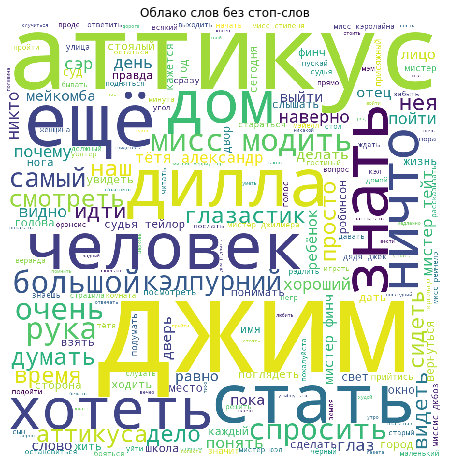

In [46]:
from wordcloud import WordCloud
from nltk.corpus import stopwords


stops = set(stopwords.words('russian') + ['это', 'весь', 'который', 'свой', 'сказать', 'мочь', 'говорить'])
text = ' '.join([word for word in df['Лемма'].values if word not in stops])

wordcloud = WordCloud(
    background_color ='white',
    width = 900,
    height = 900, 
).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов без стоп-слов')
plt.show()

### Новые графики

##### Воссоздаем лемматизированный текст

In [105]:
lemma_list = []
words_numb = 0
for w in ana_text:
    a = w[0]
    lemma_list.append(a.normal_form)
    words_numb += 1

### Количество глаголов каждого вида в зависимости от времени

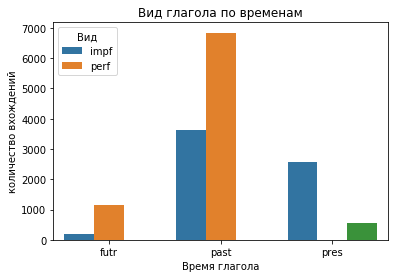

In [106]:
df2 = df[(df['Время'] != '')][['POS', 'Вид', 'Время']].groupby(['Время', 'Вид'], as_index=False).count()

df2.columns = ['Время', 'Вид', 'total']
sns.barplot(x="Время", y="total", hue='Вид', data=df2)
plt.title('Вид глагола по временам')
plt.xlabel('Время глагола')
plt.ylabel('количество вхождений');

### Зависит ли частотность слов от его длины (длины его леммы)

In [107]:
import collections

freq_c = collections.Counter()
for word in lemma_list:
    freq_c[word] += 1  #считаем частотность всех слов

#### Создаем словарь, в котором ключ - длина слова, а значение - суммарное количество вхождений

In [117]:
freq_dict = collections.Counter()
dict(freq_c)
for c in freq_c:
    freq_dict[len(c)] += freq_c[c]

#### Считаем частотность для каждой длины

In [120]:
new_dict = {}
for i in freq_dict:
    new_dict[i] = freq_dict[i]/words_numb

#### Сортируем словарь по ключам

In [122]:
list_keys = list(new_dict.keys())
list_keys.sort()
mydict = {}
for i in list_keys:
    mydict[i] = new_dict[i]

#### Строим график

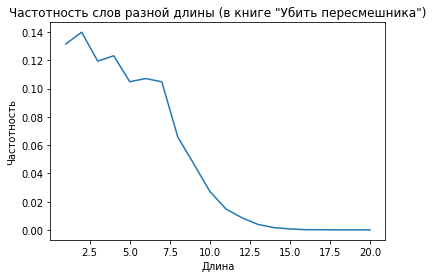

In [124]:
x = list(mydict.keys())
y = list(mydict.values())

plt.plot(x, y) 
plt.title('Частотность слов разной длины (в книге "Убить пересмешника")')
plt.ylabel('Частотность') 
plt.xlabel('Длина') 
plt.show()

#### График упоминания героев книги

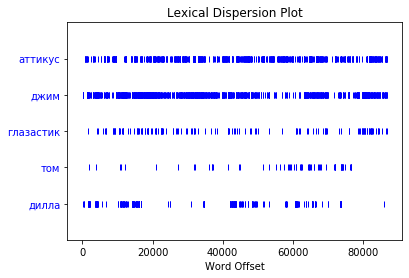

In [56]:
from nltk.draw.dispersion import dispersion_plot

names =['аттикус', 'джим', 'глазастик', 'том', 'дилла']
dispersion_plot(lemma_list, names)